In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats

In [ ]:
df = pd.read_csv("Housing.csv")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#Descriptiva de variables cuantitativas
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['mainroad'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
mainroad,
no,14.13
yes,85.87


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['guestroom'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
guestroom,
no,82.2
yes,17.8


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['basement'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
basement,
no,64.95
yes,35.05


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['hotwaterheating'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
hotwaterheating,
no,95.41
yes,4.59


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['prefarea'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
prefarea,
no,76.51
yes,23.49


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['airconditioning'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
airconditioning,
no,68.44
yes,31.56


In [ ]:
#Descriptiva variables discretas con tabla de frecuencias
tab = pd.crosstab(index=df['furnishingstatus'], columns='percentage')
round(tab/tab.sum()*100, 2)

col_0,percentage
furnishingstatus,
furnished,25.69
semi-furnished,41.65
unfurnished,32.66


In [ ]:
pd.crosstab(index=df['hotwaterheating'], columns=df['airconditioning'],margins=True)

airconditioning,no,yes,All
hotwaterheating,,,
no,349,171,520
yes,24,1,25
All,373,172,545


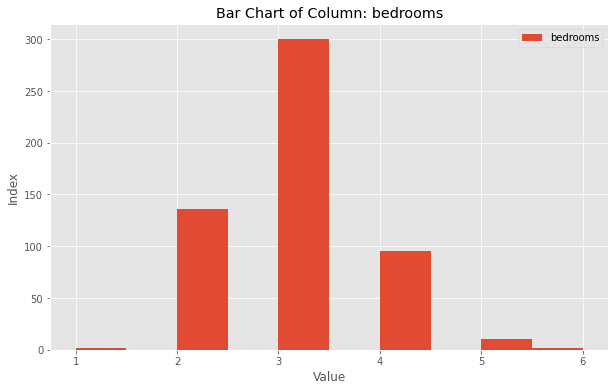

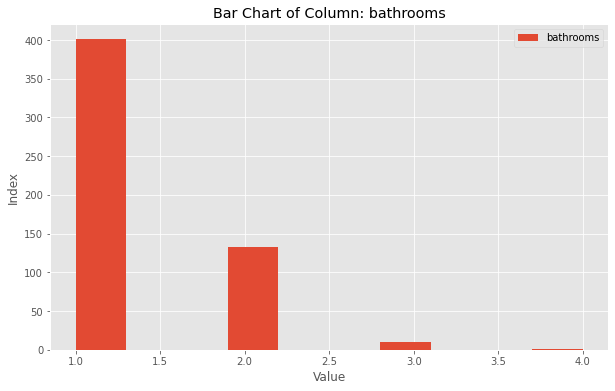

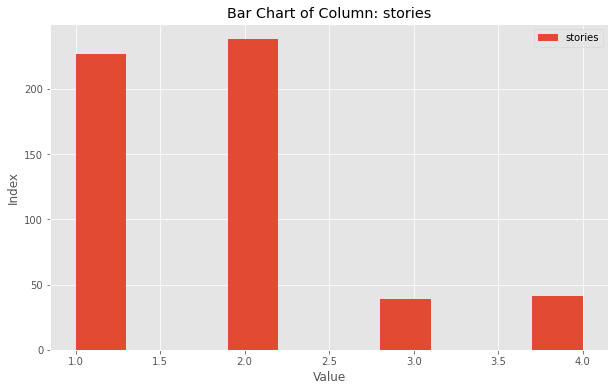

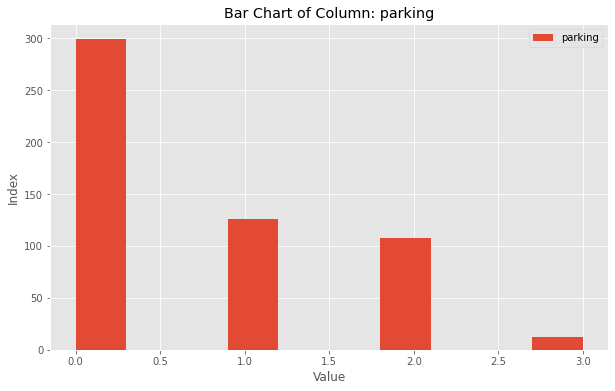

In [ ]:
data = ['bedrooms', 'bathrooms', 'stories', 'parking']

# Loop over each column in the list
for col in data:
    # Create a horizontal bar chart for each column
    df[[col]].plot(kind='hist', figsize=(10, 6))
    
    # Add labels and title to the plot
    plt.xlabel('Value')
    plt.ylabel('Index')
    plt.title('Bar Chart of Column: {}'.format(col))
    
    # Show the plot
    plt.show()

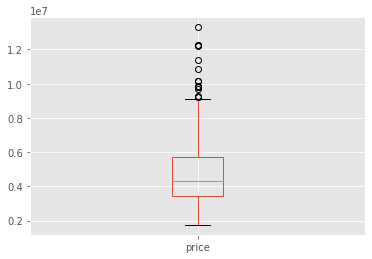

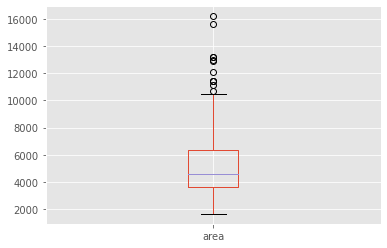

In [ ]:
lista = ['price', 'area']

for element in lista:
  fig, ax = plt.subplots()
  df.boxplot(column=element)

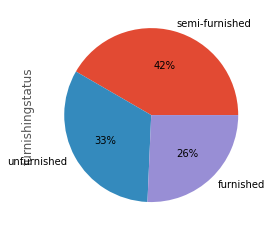

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

muebles = df['furnishingstatus'].value_counts()

muebles.plot(kind='pie', autopct='%.0f%%')
plt.show()

In [ ]:
y = df["price"].values
x = df["area"].values

In [ ]:
x = x.reshape(-1, 1)


In [ ]:
#SEPARAMOS DATOS DE ENTRENAMIENTO DE DATOS DE PRUEBA
#utilizo 80% para entrenar modelo y 20% para probarlo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

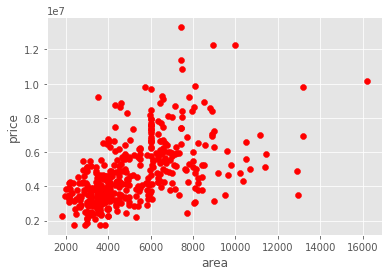

In [ ]:
plt.scatter(x_train, y_train, color = 'red')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

#algoritmo de regresión lineal
lr = LinearRegression()

#entrenar modelo
lr.fit(x_train, y_train)

#OBTENER PREDICCIÓN
y_predict = lr.predict(x_test)

print(f" Train Accuracy: {lr.score(x_train, y_train)}")
print(f" Test Accuracy: {lr.score(x_test, y_test)}")

 Train Accuracy: 0.280440192731925
 Test Accuracy: 0.30948155604620853


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

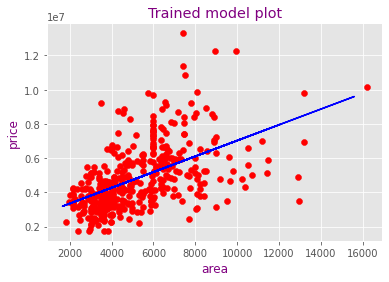

In [ ]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_test, y_predict, color = "blue")
plt.xlabel('area', color = "purple")
plt.ylabel('price', color = "purple")
plt.title('Trained model plot', color = "purple")
plt.plot